In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

In [6]:
# Nord Theme Preset for Matplotlib
PLOT_THEME = "light"

if PLOT_THEME == "dark":
    plt.style.use('dark_background')
    plt.rcParams['figure.facecolor'] = "#3B4252" # Outer background
    plt.rcParams['axes.facecolor'] = "#3B4252" # Inner background
    plt.rcParams['grid.color'] = "#4C566A"
    plt.rcParams['lines.color'] = '#ECEFF4'
    plt.rcParams['figure.edgecolor'] = "#ECEFF4"
    plt.rcParams['axes.edgecolor'] = "#ECEFF4"
    plt.rcParams['text.color'] = '#ECEFF4'
    plt.rcParams['xtick.color'] = '#ECEFF4'
    plt.rcParams['xtick.labelcolor'] = '#ECEFF4'
    plt.rcParams['ytick.color'] = '#ECEFF4'
    plt.rcParams['ytick.labelcolor'] = '#ECEFF4'
    plt.rcParams['patch.edgecolor'] = '#ECEFF4'
    # plt.rcParams['hatch.color']

elif PLOT_THEME == "light":
    plt.style.use('default')
    plt.rcParams['figure.facecolor'] = "#ECEFF4" # Outer background
    plt.rcParams['axes.facecolor'] = "#ECEFF4" # Inner background
    plt.rcParams['grid.color'] = "#E5E9F0"
    plt.rcParams['lines.color'] = '#2E3440'
    plt.rcParams['figure.edgecolor'] = "#2E3440"
    plt.rcParams['axes.edgecolor'] = "#2E3440"
    plt.rcParams['text.color'] = '#2E3440'
    plt.rcParams['xtick.color'] = '#2E3440'
    plt.rcParams['xtick.labelcolor'] = '#2E3440'
    plt.rcParams['ytick.color'] = '#2E3440'
    plt.rcParams['ytick.labelcolor'] = '#2E3440'
    plt.rcParams['patch.edgecolor'] = '#2E3440'
    # plt.rcParams['hatch.color']

plt.rcParams['font.weight'] = "light"
plt.rcParams['axes.labelweight'] = "light"
plt.rcParams['axes.axisbelow'] = True
# plt.rcParams['figure.figsize'] = (8, 5)

#### Fourier Series

$$
f(x) = \sum_{k=0}^{\infty} \left( a_k \cos \left( k\frac{2\pi x}{L} \right) + b_k \sin \left( k\frac{2\pi x}{L} \right) \right)
$$

With $a_k$ and $b_k$ given by:

$$
a_k = <f(x), \cos \left( k\frac{2\pi x}{L} \right)> = \frac{2}{L} \int_{0}^{L} f(x) \cos \left( k\frac{2\pi x}{L} \right) dx \\ \\
b_k = <f(x), \sin \left( k\frac{2\pi x}{L} \right)> = \frac{2}{L} \int_{0}^{L} f(x) \sin \left( k\frac{2\pi x}{L} \right) dx
$$

To compute $a_k$ and $b_k$ we use the following discrete approximation:

$$
a_k = \frac{2}{N} \sum_{n=0}^{N-1} f(x_n) \cos \left( k\frac{2\pi x_n}{L} \right) \\ \\
b_k = \frac{2}{N} \sum_{n=0}^{N-1} f(x_n) \sin \left( k\frac{2\pi x_n}{L} \right)
$$

Where $x_n = \frac{nL}{N}$ and $n = 0, 1, 2, ..., N-1$.

In [13]:
# def fourier_seires(f, n, L, dx = 0.01):
#     '''
#     f: function to approximate
#     n: number of terms
#     L: periodicity
#     dx: step size
#     '''

#     # Initialise coefficients
#     A = [0] * n
#     B = [0] * n

#     A[0] = 1 / L

#     # Define fourier series sum
#     summ = [0] * n
#     summ[0]


#     for k in range(n):
#         A[k] = 1 / L * 
#         B[k] = 1 / L * 
#         summ[k] = A[k] * np.cos(2 * np.pi * k * x / L) + B[k] * np.sin(2 * np.pi * k * x / L)

#     return summ[-1]
    

In [8]:
# Define function domain [-\pi, \pi]
dx = 0.001
L = np.pi
x = L * np.arange(-1, 1, dx)
n = len(x)
nquart = int(np.floor(n / 4)) # Number of points in each quadrant, here = 500

/var/folders/p6/smj7c6c1417csf_h79x5rk4h0000gn/T/ipykernel_78961/2912954937.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab10")


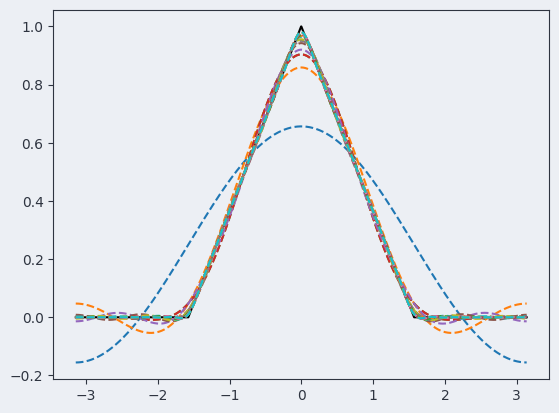

In [15]:
# Define the target "hat" function
f = np.zeros_like(x)
f[nquart:nquart * 2] = (4 / n) * np.arange(1, nquart + 1) # 1st quadrant
f[nquart * 2:nquart * 3] = np.ones(nquart) - (4 / n) * np.arange(0, nquart) # 2nd quadrant

fig, ax = plt.subplots(clear = True)
ax.plot(x, f, "-", color = 'k')



# Compute Fourier Series
name = "Accent"
cmap = get_cmap("tab10")
colors = cmap.colors
ax.set_prop_cycle(color = colors)

A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0 / 2 # Initilaise the Fourier Series sum

n = 20
A = np.zeros(n)
B = np.zeros(n)
for k in range(n):
    A[k] = np.sum(f * np.cos((k + 1) * np.pi * x / L)) * dx # Notice we are using k + 1 since python index starts at 0
    B[k] = np.sum(f * np.sin((k + 1) * np.pi * x / L)) * dx
    fFS = fFS + A[k] * np.cos((k + 1) * np.pi * x / L) + B[k] * np.sin((k + 1) * np.pi * x / L)
    ax.plot(x, fFS, "--")
plt.show()

NameError: name 'A0' is not defined